In [1]:
#Unsupervised text clustering 
#Data : https://www.kaggle.com/akshatpathak/text-data-clustering/data

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("cooking.csv")

In [3]:
df

,id,title,content,tags
0,1,How can I get chewy chocolate chip cookies?,<p>My chocolate chips cookies are always too c...,baking cookies texture
1,2,How should I cook bacon in an oven?,<p>I've heard of people cooking bacon in an ov...,oven cooking-time bacon
2,3,What is the difference between white and brown...,"<p>I always use brown extra large eggs, but I ...",eggs
3,4,What is the difference between baking soda and...,<p>And can I use one in place of the other in ...,substitutions please-remove-this-tag baking-so...
4,5,"In a tomato sauce recipe, how can I cut the ac...",<p>It seems that every time I make a tomato sa...,sauce pasta tomatoes italian-cuisine
...,...,...,...,...
15399,73670,Poached eggs at altitude?,<p>I recently signed up for America's Test Kit...,eggs poaching high-altitude
15400,73678,How to thicken buttercream without adding more...,<p>I made some buttercream frosting for browni...,frosting
15401,73680,Looking for old Italian recipe for chamellas,<p>My Italian mom gowould pour flour on a boar...,baking
15402,73681,Can i make ice cream with artificial sweetener,<p>I wonder if an artificial sweetener like su...,ice-cream


In [16]:
text_with_punctuation=df['content']

In [23]:
#Remove punctuation and convert to lower-case
import nltk
import string
tokenizer = nltk. RegexpTokenizer(r"\w+")

text=[]

for i in text_with_punctuation:
    new_words = tokenizer. tokenize(i)
    text.append((' '.join(new_words)).lower())

In [24]:
import keras
from keras.preprocessing.text import Tokenizer

t=Tokenizer()
t.fit_on_texts(text)
X = t.texts_to_matrix(text)

In [25]:
import sklearn
from sklearn.decomposition import PCA
import numpy as np

X=np.array(X)

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [26]:
PCA_X=pca.transform(X)

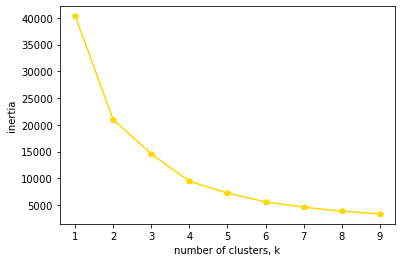

In [27]:
#Elbo method for selecting optimal number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k,       )
    
    # Fit model to samples
    model.fit(PCA_X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

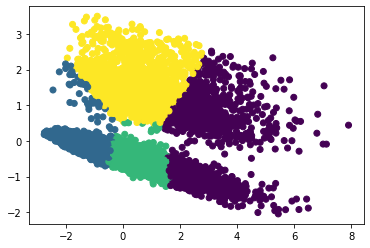

In [28]:
model = KMeans(n_clusters=4)
model.fit(PCA_X)

labels = model.predict(PCA_X)
plt.scatter(PCA_X.T[0], PCA_X.T[1], c=labels)
plt.show()

In [29]:
cluster_0_text=[]
cluster_1_text=[]
cluster_2_text=[]
cluster_3_text=[]

for i in np.arange(labels.shape[0]):
    if labels[i]==0:
        cluster_0_text.append(df["content"][i])
    elif labels[i]==1:
        cluster_1_text.append(df["content"][i])
    elif labels[i]==2:
        cluster_2_text.append(df["content"][i])
    elif labels[i]==3:
        cluster_2_text.append(df["content"][i])    
    else:    
        pass

In [30]:
#Nearest neighbors after PCA. Ideally this should be applied to each cluster for finding similar texts within each cluster for each text within the cluster.

from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(PCA_X)

In [31]:
distances, indices = nbrs.kneighbors(PCA_X)

In [63]:
indices[8366]

array([ 8366,  7043,  5698, 11764,   393])

In [67]:
df['content'][5698]

"<p>How to quickly prepare fresh snails?</p>\n\n<p>I've heard snails must be soaked in salted water for a few hours in order to remove the mucus but a friend of mine suggested that the ones in shells can be simply thrown into the hot ash and after a dozen of minutes they can be taken off the shell and eaten. </p>\n\n<p>Was he right? What is the fastest way to prepare snail for eating? I mean, fastest way to prepare them so, that they would be safe food (killed parasites etc.)</p>\n"